# Задание №3 по Python. Pandas
## Выполнил Аванесян Т.Г.

## Исходные данные
В приложенных файлах вы увидите данные по прохождению студентами тестов на образовательной платформе. Такие данные можно использовать для построения персонализированных ИИ-ассистентов для поддержки обучения студента. Пока сосредоточимся на начальном этапе — сборе и подготовке данных.



## Задача
Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.


### Библиотеки


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectures

### Описание данных

##### lecture_id:
внешний ключ для столбца content_type_id в train.csv, если типом контента является лекция будет 1.
##### part:
курс к которому относится лекция.
##### tag:
один код тега для лекции. Значение тегов не будет предоставлено, но этих кодов достаточно для кластеризации лекций вместе.
##### type_of:
краткое описание основной цели лекции.



#### Загружаем исходные данные

In [4]:
data_lectures = pd.read_csv(r'C:\Users\AvanesianTG\Desktop\DA\URFU\Python\lectures.csv', encoding='utf8')

Смотрим первые строки

In [5]:
data_lectures.head(10)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
5,335,114,2,concept
6,484,179,5,concept
7,641,134,6,solving question
8,761,93,1,concept
9,814,80,5,solving question


#### Смотрим сводную информацию и проверяем исходные данные

In [6]:
data_lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


Таблица имеет 418 строк и состоит из 4 столбцов. Все значения ненулевые.

Проверяем отсутствие дублирующихся ключей

In [7]:
data_lectures[data_lectures.duplicated(['lecture_id'])]

,lecture_id,tag,part,type_of


Дублирующихся ключей не обнаружено.

#### Смотрим статистические данные

In [8]:
data_lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


#### Строим распределение

Группируем по цели лекции и разделу с подсчетом количества строк

In [9]:
data_lectures.groupby(['type_of','part']).size()

type_of           part
concept           1       20
                  2       18
                  3        7
                  4       19
                  5       72
                  6       63
                  7       23
intention         2        7
solving question  1       34
                  2       31
                  3       12
                  4       12
                  5       69
                  6       19
                  7        9
starter           5        2
                  6        1
dtype: int64

Количество intention и starter незначительно

Смотрим общее число разделов по курсам

In [10]:
data_lectures['part'].value_counts()

5    143
6     83
2     56
1     54
7     32
4     31
3     19
Name: part, dtype: int64

Наибольшее число занятий в 5, 6, 2 и 1 разделах.
Построим распределение тегов и разделов.


<AxesSubplot:xlabel='part', ylabel='tag'>

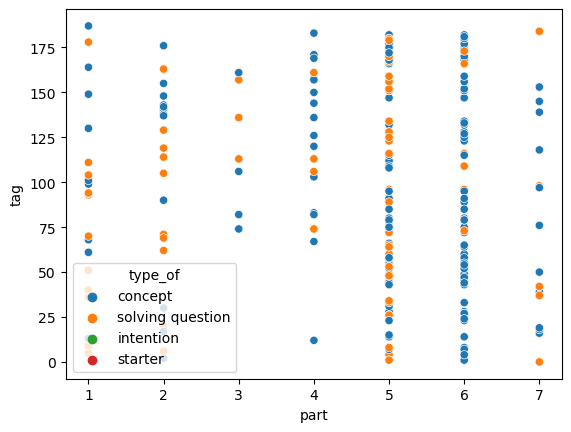

In [11]:
sns.scatterplot(data = data_lectures, x = 'part', y = 'tag', hue = 'type_of')

<AxesSubplot:xlabel='tag', ylabel='Count'>

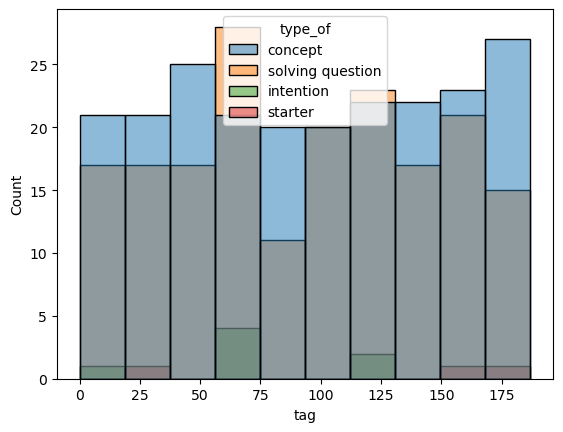

In [12]:
sns.histplot(data = data_lectures, x = 'tag', hue = 'type_of')

#### Связь между тегами и описанием лекций отсутствует

<AxesSubplot:xlabel='part', ylabel='Count'>

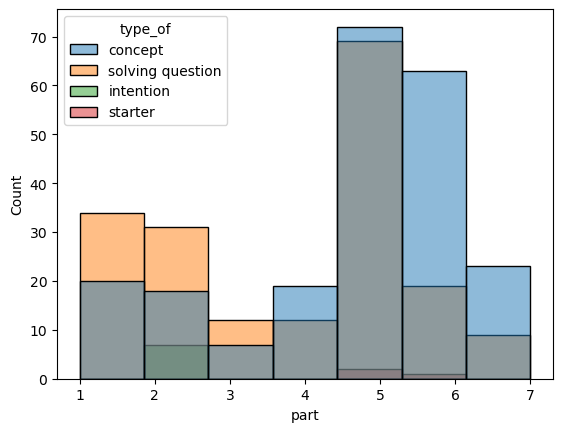

In [13]:
sns.histplot(data = data_lectures, x = 'part', hue = 'type_of', bins = 7)

#### При рассмотрении распределения разделов и описаний лекций видим, что в 1, 2 и 3 разделах больше практики, в остальных - теории

## QUESTIONS

### Описание данных


##### question_id:
внешний ключ для столбца content_id обучения/тестирования, когда типом контента является вопрос (0).
##### bundle_id:
код, для которого вопросы подаются вместе.
##### correct_answer:
ответ на вопрос. Можно сравнить со столбцом user_answer в train.csv, чтобы проверить, верно ли ответил студент.
##### part:
соответствующий раздел теста TOEIC.
##### tags:
один или несколько подробных кодов тегов для вопроса. Значение тегов не будет предоставлено, но этих кодов достаточно для кластеризации вопросов вместе.

#### Загружаем исходные данные

In [15]:
data_questions = pd.read_csv(r'C:\Users\AvanesianTG\Desktop\DA\URFU\Python\questions.csv', encoding='utf8')

Смотрим первые строки

In [16]:
data_questions.head(10)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
5,5,5,2,1,131 149 162 81
6,6,6,2,1,10 94 162 92
7,7,7,0,1,61 110 162 29
8,8,8,3,1,131 13 162 92
9,9,9,3,1,10 164 81


#### Смотрим сводную информацию и проверяем исходные данные

In [17]:
data_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


Таблица имеет 13 523 строк и состоит из 5 столбцов. Все значения ненулевые.
Тип данных для первых 4 столбцов наверняка превосходит необходимый объем, проверяем.

In [18]:
data_questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


Так и есть, типы данных можно заменить для экономии места, но особого смысла это не имеет.

In [19]:
data_questions[data_questions.duplicated(['question_id'])]

,question_id,bundle_id,correct_answer,part,tags


Проверим данные на наличие пропусков

In [20]:
data_questions.isna().sum() 

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

Найдем его

In [21]:
data_questions[data_questions.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


Получим распределение числа внешних ключей по по разделам.

In [22]:
data_questions[['part', 'question_id']].groupby(['part'], as_index = False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


Сильно выделяются данные по 5 разделу. Проиллюстрируем это.

<AxesSubplot:xlabel='part', ylabel='Count'>

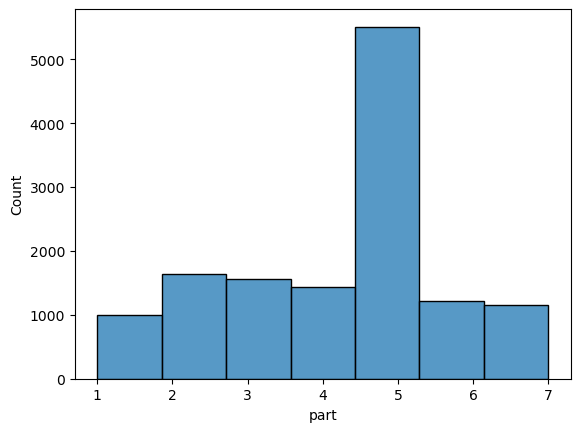

In [23]:
sns.histplot(data = data_questions, x = 'part', bins = 7)

In [24]:
data_questions_f5 = data_questions[data_questions['part'] == 5]
data_questions_f6 = data_questions[data_questions['part'] == 5]

## TRAIN

### Описание данных

##### row_id: (int64)
Идентификационный код для строки.
##### timestamp: (int64) 
время в миллисекундах между этим взаимодействием с пользователем и завершением первого события от этого пользователя.
##### user_id: (int32) 
Идентификационный код пользователя.
##### content_id: (int16)
Идентификационный код для взаимодействия с пользователем
##### content_type_id: (int8)
0, если событие было вопросом, задаваемым пользователю, 1, если событием был пользователь, наблюдавший лекцию.
##### task_container_id: (int16)
Идентификационный код для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидеть объяснения по любому из них. Все эти трое будут иметь общую task_container_id.
##### user_answer: (int8)
ответ пользователя на вопрос, если таковой имеется. Прочитайте -1 как null, для лекций.
##### answered_correctly: (int8)
если пользователь ответил правильно. Прочитайте -1 как null, для лекций.
##### prior_question_elapsed_time: (float32)
Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос в предыдущем пакете вопросов, игнорируя любые лекции между ними. Имеет значение null для первого пакета вопросов или лекции пользователя. Обратите внимание, что время — это среднее время, которое пользователь потратил на решение каждого вопроса в предыдущем пакете.
##### prior_question_had_explanation: (bool)
Увидел ли пользователь объяснение и правильный ответ (ответы) после ответа на предыдущий пакет вопросов, игнорируя любые лекции между ними. Значение разделяется для одного пакета вопросов и равно null для первого пакета вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью диагностического теста на адаптации, где они не получали никакой обратной связи.

#### Загружаем исходные данные

In [25]:
data_train = pd.read_csv(r'C:\Users\AvanesianTG\Desktop\DA\URFU\Python\train.csv', encoding='utf8')

Смотрим первые строки

In [26]:
data_train.head(10)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
5,5,157063,115,156,0,5,2,1,5000.0,False
6,6,176092,115,51,0,6,0,1,17000.0,False
7,7,194190,115,50,0,7,3,1,17000.0,False
8,8,212463,115,7896,0,8,2,1,16000.0,False
9,9,230983,115,7863,0,9,0,1,16000.0,False


#### Смотрим сводную информацию и проверяем исходные данные

In [27]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


#### Меняем тип данных для экономии места и удаляем ненужный столбец.

In [28]:
data_train['timestamp'] = data_train['timestamp'].astype('uint64')
data_train['user_id'] = data_train['user_id'].astype('uint32')
data_train['content_id'] = data_train['content_id'].astype('uint16')
data_train['content_type_id'] = data_train['content_type_id'].astype('int16')
data_train['task_container_id'] = data_train['task_container_id'].astype('uint16')
data_train['user_answer'] = data_train['user_answer'].astype('int16')
data_train['answered_correctly'] = data_train['answered_correctly'].astype('int16')
data_train['prior_question_elapsed_time'] = data_train['prior_question_elapsed_time'].astype('float32')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       uint64 
 2   user_id                         uint32 
 3   content_id                      uint16 
 4   content_type_id                 int16  
 5   task_container_id               uint16 
 6   user_answer                     int16  
 7   answered_correctly              int16  
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  object 
dtypes: float32(1), int16(3), int64(1), object(1), uint16(2), uint32(1), uint64(1)
memory usage: 4.0+ GB


#### Выводим статистику по числовым признакам

In [29]:
data_train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,1.300508e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,2.122839e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


#### Проводим анализ по наличию категориальных и числовых признаков

In [30]:
cat_col = []
num_col = []

for column_name in data_train.columns:
    if (data_train[column_name].dtypes == object):
        cat_col += [column_name]
    else:
        num_col += [column_name]

print('Категориальные данные:\t ',cat_col, '\n Число столбцов =', len(cat_col))
print('Числовые данные:\t ', num_col, '\n Число столбцов =', len(num_col))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столбцов = 1
Числовые данные:	  ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столбцов = 9


#### Построим распределние по каждому признаку
Для больших значений

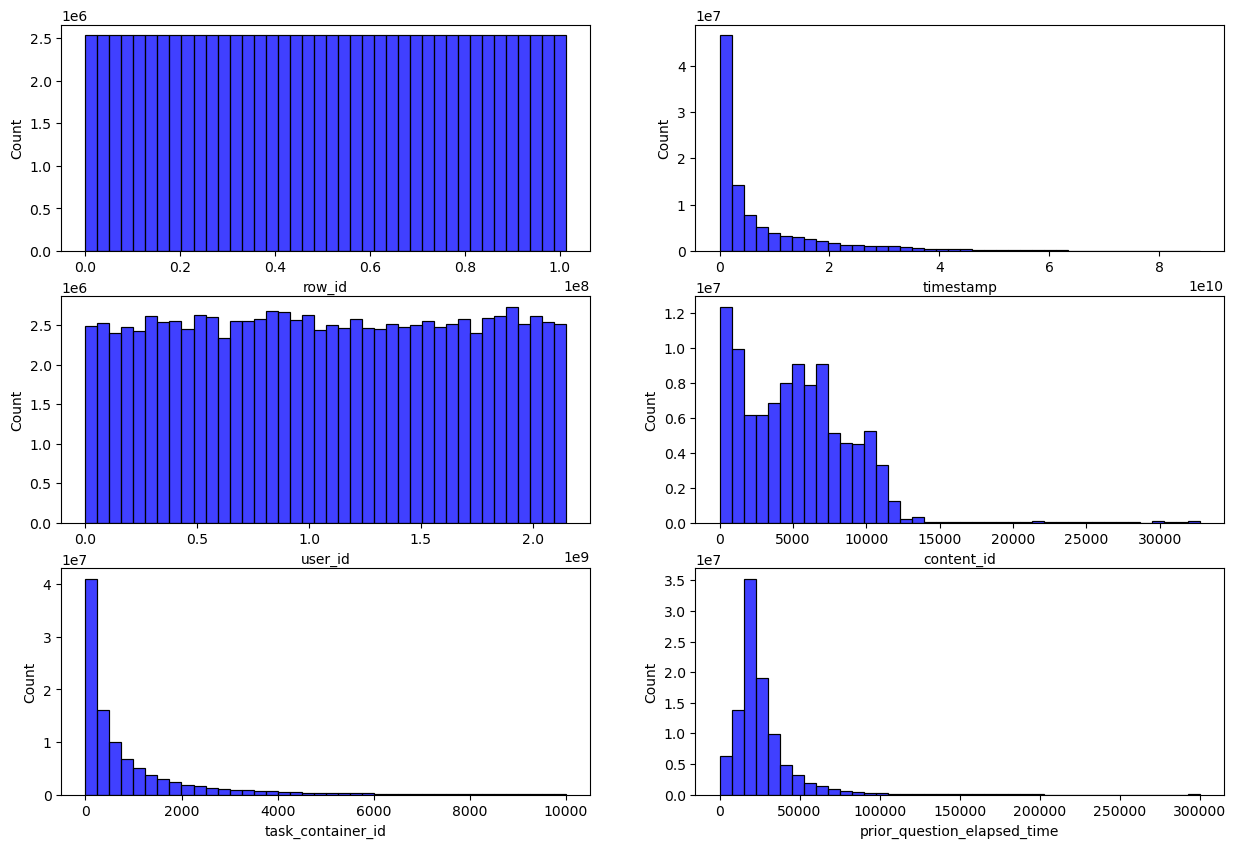

In [31]:
num_col_big = ['row_id', 'timestamp', 'user_id', 'content_id', 'task_container_id', 'prior_question_elapsed_time']
width = 2
height = int(np.ceil(len(num_col_big) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (15, 10))

for idx, column_name in enumerate(num_col_big):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = data_train, x = column_name, bins = 40, color = 'blue')

Для маленьких значений

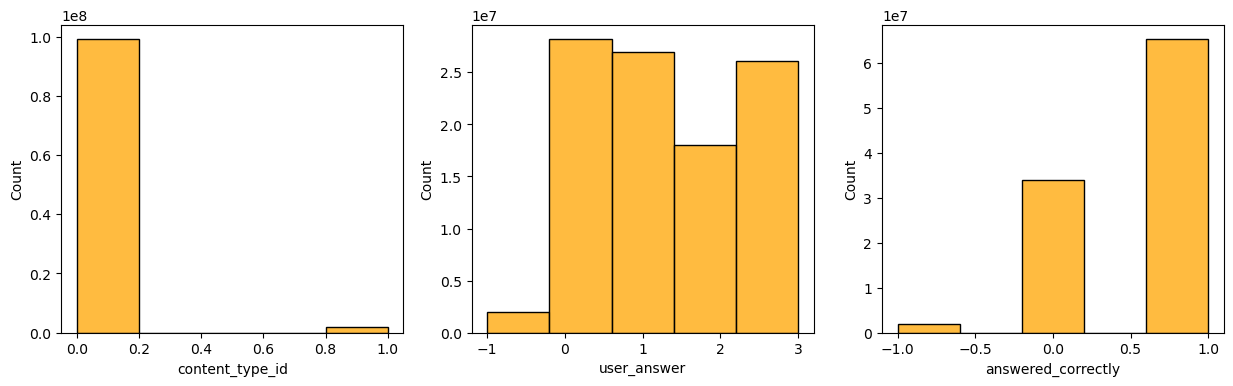

In [32]:
num_col_small = ['content_type_id', 'user_answer', 'answered_correctly']
width = 3
height = int(np.ceil(len(num_col_small) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (15, 4))

for idx, column_name in enumerate(num_col_small):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = data_train, x = column_name, bins = 5, color = 'orange')

### Очистим данные

In [33]:
data_train.isna().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

Пропуски во времени ответа на вопрос

In [34]:
data_train[data_train.prior_question_elapsed_time.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
96,96,0,5382,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101230195,101230195,1073593458,2147482216,21887,1,170,-1,-1,NaN,False
101230218,101230218,1240316256,2147482216,6808,1,193,-1,-1,NaN,False
101230220,101230220,1240470616,2147482216,27699,1,195,-1,-1,NaN,False
101230222,101230222,1240524060,2147482216,5752,1,197,-1,-1,NaN,False


Пропуски вытекают из условия

Пропуски в просмотре объяснений и правильных ответов

In [35]:
data_train[data_train.prior_question_had_explanation.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
96,96,0,5382,5000,0,0,0,1,NaN,NaN
224,224,0,8623,3915,0,0,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101228989,101228989,0,2147470770,7900,0,0,0,1,NaN,NaN
101229217,101229217,0,2147470777,7900,0,0,2,0,NaN,NaN
101229975,101229975,0,2147481750,4137,0,0,0,0,NaN,NaN
101230025,101230025,0,2147482216,3748,0,0,1,0,NaN,NaN


Дубликаты

In [36]:
data_train.duplicated().sum()

0

### Рассмотрим корреляцию между признаками и успеваемостью студентов

In [66]:
cm = sns.color_palette("vlag", as_cmap = True)
data_train_corr = data_train.loc[:,['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time']]
data_train_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
timestamp,1.000000,-0.000041,0.052931,0.000974,0.433359,0.000724,0.025452,0.013934
user_id,-0.000041,1.000000,0.000868,-0.000150,0.001498,0.000156,-0.000307,0.000308
content_id,0.052931,0.000868,1.000000,0.414640,0.046304,-0.106668,-0.196960,0.151661
content_type_id,0.000974,-0.000150,0.414640,1.000000,-0.019647,-0.279818,-0.436912,nan
task_container_id,0.433359,0.001498,0.046304,-0.019647,1.000000,0.008532,0.061129,-0.013412
user_answer,0.000724,0.000156,-0.106668,-0.279818,0.008532,1.000000,0.126471,0.014570
answered_correctly,0.025452,-0.000307,-0.196960,-0.436912,0.061129,0.126471,1.000000,-0.007900
prior_question_elapsed_time,0.013934,0.000308,0.151661,nan,-0.013412,0.014570,-0.007900,1.000000


Добавим столбец с долей верных ответов и проверим корреляцию

In [38]:
data_train_corr['cor_ratio'] = data_train_corr.answered_correctly / data_train_corr.user_answer
data_train_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,cor_ratio
timestamp,1.000000,-0.000041,0.052931,0.000974,0.433359,0.000724,0.025452,0.013934,0.024417
user_id,-0.000041,1.000000,0.000868,-0.000150,0.001498,0.000156,-0.000307,0.000308,-0.000491
content_id,0.052931,0.000868,1.000000,0.414640,0.046304,-0.106668,-0.196960,0.151661,0.078863
content_type_id,0.000974,-0.000150,0.414640,1.000000,-0.019647,-0.279818,-0.436912,nan,0.244676
task_container_id,0.433359,0.001498,0.046304,-0.019647,1.000000,0.008532,0.061129,-0.013412,0.039900
user_answer,0.000724,0.000156,-0.106668,-0.279818,0.008532,1.000000,0.126471,0.014570,-0.529601
answered_correctly,0.025452,-0.000307,-0.196960,-0.436912,0.061129,0.126471,1.000000,-0.007900,0.532950
prior_question_elapsed_time,0.013934,0.000308,0.151661,nan,-0.013412,0.014570,-0.007900,1.000000,-0.016830
cor_ratio,0.024417,-0.000491,0.078863,0.244676,0.039900,-0.529601,0.532950,-0.016830,1.000000


Удалив ненужные столбцы получаем

In [68]:
data_train_corr.drop(data_train_corr.columns[[0, 1, 2, 4, 7]], axis = 1, inplace = True)
data_train_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,content_type_id,user_answer,answered_correctly
content_type_id,1.000000,-0.279818,-0.436912
user_answer,-0.279818,1.000000,0.126471
answered_correctly,-0.436912,0.126471,1.000000


Распределение успеваемости будет иметь вид

<AxesSubplot:xlabel='cor_ratio', ylabel='Count'>

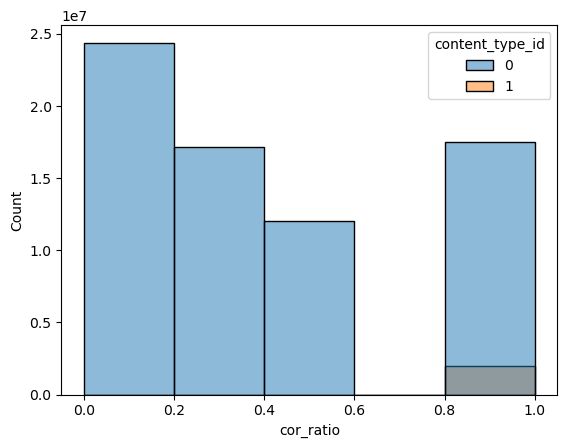

In [40]:
sns.histplot(data = data_train_corr, x = 'cor_ratio', hue = 'content_type_id', bins = 5)

Следовательно, зависимость успеваемости от вопроса/лекции слабая

### Рассмотрим распределение ответов

Определим число студентов

In [41]:
data_train.agg({'user_id': pd.Series.nunique}) 

user_id    393656
dtype: int64

Получим общее число ответов и число правильных ответов у студентов

In [42]:
unique_data_train = data_train[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()
unique_data_train.head()

,user_id,user_answer,answered_correctly
0,115,72,32
1,124,49,7
2,2746,31,10
3,5382,169,81
4,8623,149,67


In [43]:
unique_data_train.describe()

,user_id,user_answer,answered_correctly
count,3.936560e+05,393656.000000,393656.000000
mean,1.076358e+09,353.875889,160.763700
std,6.201319e+08,1038.467530,507.219402
min,1.150000e+02,0.000000,-11.000000
25%,5.387596e+08,37.000000,11.000000
50%,1.077717e+09,60.000000,23.000000
75%,1.613533e+09,214.000000,92.000000
max,2.147483e+09,25162.000000,14229.000000


Воспользуемся функцией минимизации разброса числа верных ответов

In [44]:
def rem_emission(data_train, col, k_std): 
        mean = data_train[col].mean() # среднее значение col
        std_o = data_train[col].std() # стандартное отклонение col
        return data_train[(data_train[col] <= mean + (k_std * std_o))]

In [45]:
unique_data_train = rem_emission(unique_data_train, 'user_answer', 1) 

Добавим столбец с долей верных ответов

In [83]:
unique_data_train['cor_ratio'] = unique_data_train.answered_correctly / unique_data_train.user_answer

Выведем первые и последние строки

In [84]:
unique_data_train

,user_id,user_answer,answered_correctly,cor_ratio
0,115,72,32,0.444444
1,124,49,7,0.142857
2,2746,31,10,0.322581
3,5382,169,81,0.479290
4,8623,149,67,0.449664
...,...,...,...,...
393651,2147470770,308,171,0.555195
393652,2147470777,1066,514,0.482176
393653,2147481750,52,38,0.730769
393654,2147482216,363,172,0.473829


Обновленные статистические данные

In [85]:
unique_data_train.describe()

,user_id,user_answer,answered_correctly,cor_ratio
count,3.706320e+05,370632.000000,370632.000000,3.706150e+05
mean,1.076382e+09,162.647402,69.718044,inf
std,6.201116e+08,247.494832,115.027280,NaN
min,1.150000e+02,0.000000,-11.000000,-1.929825e-01
25%,5.386172e+08,36.000000,11.000000,2.926829e-01
50%,1.077896e+09,55.000000,20.000000,3.902439e-01
75%,1.613481e+09,159.000000,67.000000,4.705882e-01
max,2.147483e+09,1392.000000,920.000000,inf


Медианное число ответов составит

In [86]:
unique_med = unique_data_train.user_answer.median()
print('Медианное число ответов студентов составляет', int(unique_med))

Медианное число ответов студентов составляет 55


Проиллюстрируем это

<AxesSubplot:xlabel='user_answer', ylabel='Count'>

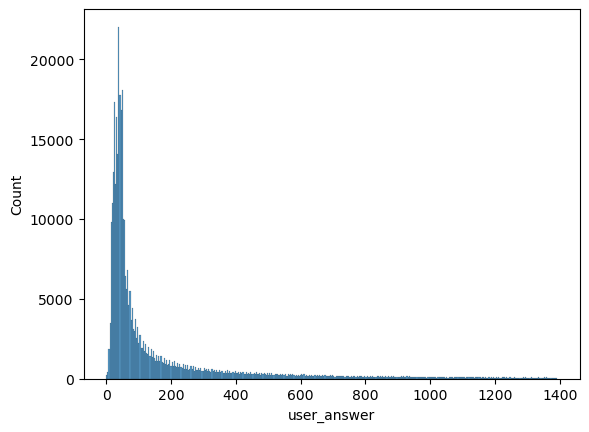

In [87]:
sns.histplot(data = unique_data_train, x = 'user_answer')

Виден сильный перекос в интервале 40-100. Нормализуем данные

Рассмотрим распределение числа ответов, больше медианного

In [88]:
unique_data_train['cor_ratio'] = unique_data_train.answered_correctly / unique_data_train.user_answer

0.42748091603053434


<AxesSubplot:>

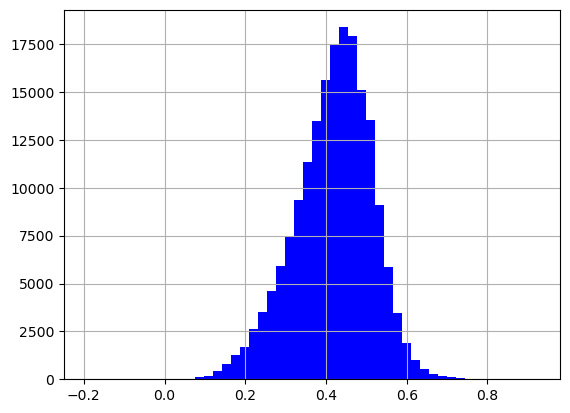

In [89]:
print(unique_data_train.query('user_answer > 55')['cor_ratio'].median())
unique_data_train.query('user_answer > 55')['cor_ratio'].hist(bins = 50, color = 'blue')

Рассмотрим распределение числа ответов, больше 75 %

0.44871794871794873


<AxesSubplot:>

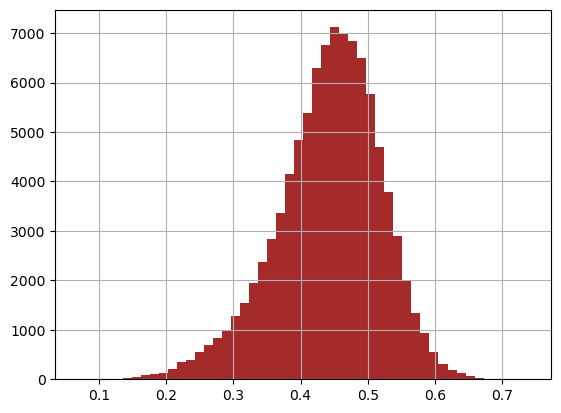

In [90]:
print(unique_data_train.query('user_answer > 151')['cor_ratio'].median())
unique_data_train.query('user_answer > 151')['cor_ratio'].hist(bins = 50, color = 'brown')

Рассмотрим распределение числа ответов, больше 500

0.45819935691318325


<AxesSubplot:>

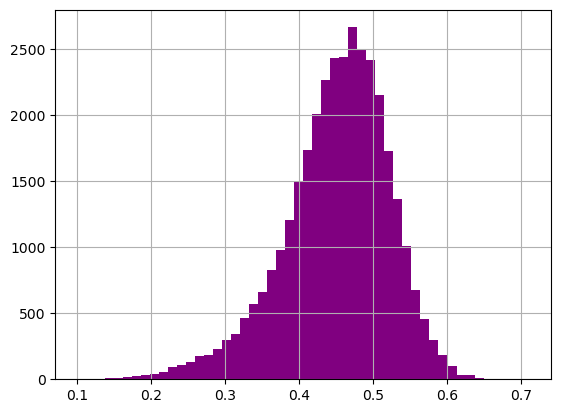

In [91]:
print(unique_data_train.query('user_answer > 500')['cor_ratio'].median())
unique_data_train.query('user_answer > 500')['cor_ratio'].hist(bins = 50, color = 'purple')

0.42168674698795183


<AxesSubplot:>

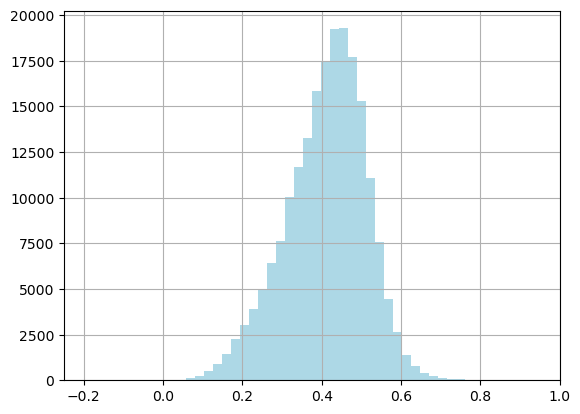

In [92]:
print(unique_data_train.query('0 < user_answer > 50')['cor_ratio'].median())
unique_data_train.query('0 < user_answer > 50')['cor_ratio'].hist(bins = 50, color = 'lightblue')

Из графиков следует, что студенты ответившие на число вопросов меньше медианного значения справлялись хуже. При этом количество ответов выше медианного значения слабо сказалось на числе правильных ответов.

#### Взаимосвязь времени между взаимодействием со студентом и завершением первого события от него, среднего времени ответа на каждый вопрос и количества правильных ответов с общим количеством ответов студентов

Группируем общее кол-во ответов, кол-во правильных ответов и время ответа на каждый вопрос студентов по их идентификаторам в датафрейм corr_look

In [93]:
corr_look = data_train[['user_id', 'user_answer', 'answered_correctly', 'timestamp', \
    'prior_question_elapsed_time']].groupby(['user_id'], as_index = False).sum()

Добавляем столбец timestamp_ratio соотношения времени между взаимодействием со студентом и завершением первого события от него к общему кол-ву ответов студентов

In [94]:
corr_look['timestamp_ratio'] = corr_look['timestamp'] / corr_look['user_answer']

Добавляем столбец elapsed_time_ratio соотношения среднего времени ответа на каждый вопрос к общему кол-ву ответов студентов

In [95]:
corr_look['elapsed_time_ratio'] = corr_look['prior_question_elapsed_time'] / corr_look['user_answer']

Добавляем столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)

In [96]:
corr_look['cor_ratio'] = corr_look.answered_correctly / corr_look.user_answer

Удаляем ненужные столбцы

In [97]:
corr_look.drop(corr_look.columns[[0, 2, 3, 4]], axis = 1, inplace = True)

Вызываем функцию сокращения разброса ответов

In [98]:
corr_look = rem_emission(corr_look, 'user_answer', 1)

Проверим работу функции и выведем первые и последние 5 строк

In [99]:
corr_look

,user_answer,timestamp_ratio,elapsed_time_ratio,cor_ratio
0,72,6.524638e+07,12458.319336,0.444444
1,49,2.252203e+05,11122.387695,0.142857
2,31,2.472123e+05,10483.871094,0.322581
3,169,2.879101e+08,26449.705078,0.479290
4,149,2.615750e+08,18923.490234,0.449664
...,...,...,...,...
393651,308,8.478458e+08,16924.224609,0.555195
393652,1066,8.108421e+09,14109.855469,0.482176
393653,52,2.110661e+07,16903.845703,0.730769
393654,363,6.621266e+08,14765.839844,0.473829


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='user_answer', ylabel='timestamp_ratio'>

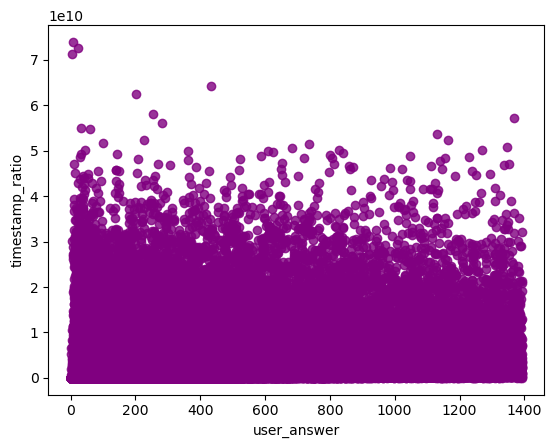

In [100]:
sns.regplot(data = corr_look, x = 'user_answer', y = 'timestamp_ratio', color = 'purple')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='user_answer', ylabel='elapsed_time_ratio'>

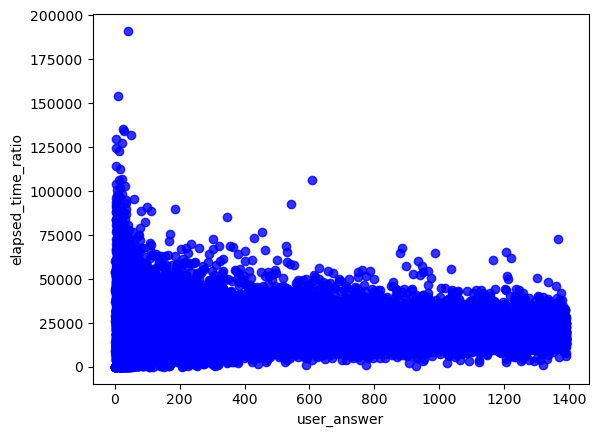

In [101]:
sns.regplot(data = corr_look, x = 'user_answer', y = 'elapsed_time_ratio', color = 'blue')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step


<AxesSubplot:xlabel='timestamp_ratio', ylabel='cor_ratio'>

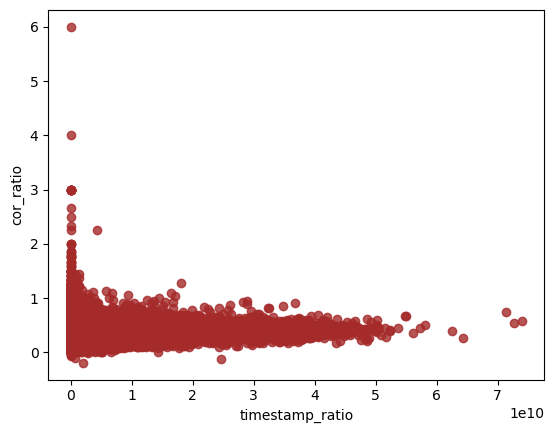

In [102]:
sns.regplot(data = corr_look, x = 'timestamp_ratio', y = 'cor_ratio', color = 'brown')

<AxesSubplot:xlabel='elapsed_time_ratio', ylabel='cor_ratio'>

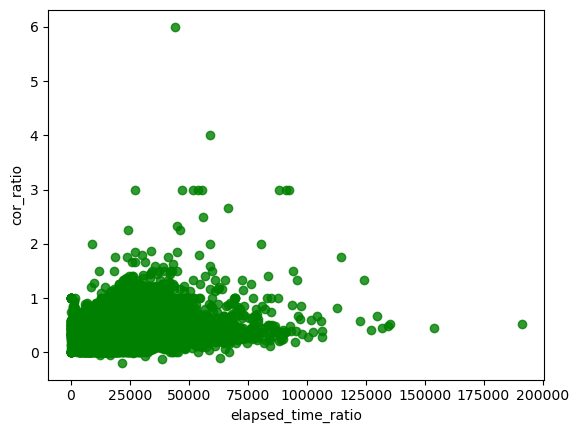

In [103]:
sns.regplot(data = corr_look, x = 'elapsed_time_ratio', y = 'cor_ratio', color = 'green')

### Выводы

- количество ответов студентов, большее медианного значения количества ответов, равного 55
- тип контента (вопрос или лекция) - очень слабо
- соотношения количества правильных ответов и среднего времени ответа на каждый вопрос к общему количеству ответов студентов - слабо